In [20]:
# For development purposes, reload imported modules when source changes
%load_ext autoreload
%autoreload 2

import spikeinterface as si
import spikewidgets as sw
import spiketoolkit as st
import os, sys

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
# Create a toy example dataset
recording, sorting_true=sw.example_datasets.toy_example1(duration=60)


# MEArec
#rec_folder = '/home/alessio/Documents/Codes/MEArec/data/recordings/recordings_20cells_Neuronexus-32_10.0_10.0uV_15-10-2018:21:52'
#recording = si.MEArecRecordingExtractor(rec_folder)
#sorting_true = si.MEArecSortingExtractor(rec_folder)

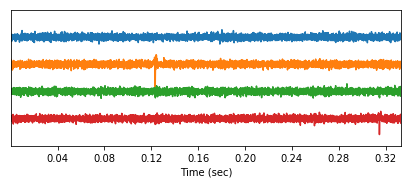

In [3]:
# View the filtered timeseries data
filt=st.filters.bandpass_filter(recording,freq_min=300,freq_max=6000)
sw.TimeseriesWidget(recording=filt,width=7,height=2.5).display()

In [ ]:
# Create a temporary working directory if needed
if not os.path.exists('tmp'): os.mkdir('tmp')

In [ ]:
# Mountainsort4 spike sorting
sorting_MS4=st.sorters.mountainsort4(
    recording=recording,
    detect_sign=-1,
    adjacency_radius=-1
)

In [5]:
# SpyKING Circus spike sorting
sorting_SC=st.sorters.spyking_circus(
    recording=recording,
    adjacency_radius=50,
    detect_sign='negative',
    output_folder='tmp',
)

TypeError: spyking_circus() got an unexpected keyword argument 'useGPU'

In [7]:
# KiloSort (old) spike sorting
sorting_KS=st.sorters.kilosort_j(
    recording=recording,
    kilosort_src='/home/alessio/Documents/Codes/spike_sorting/KiloSort',
    ironclust_src='/home/alessio/Documents/Codes/spike_sorting/ironclust',
    tmpdir='tmp',
    useGPU=False,
)

Reading timeseries header...
Num. channels = 4, Num. timepoints = 3600000, duration = 2.0 minutes
Creating argfile.txt file...
Running kilosort...
matlab -nosplash -nodisplay -r "addpath('/home/alessio/Documents/Codes/spike_sorting/spiketoolkit/spiketoolkit/sorters/old/kilosort_j');  p_kilosort('/home/alessio/Documents/Codes/spike_sorting/KiloSort', '/home/alessio/Documents/Codes/spike_sorting/ironclust', 'tmp', 'tmp/kilosort_dataset/raw.mda', 'tmp/kilosort_dataset/geom.csv', 'tmp/firings.mda', 'tmp/kilosort_dataset/argfile.txt', 0); quit;"


Index exceeds matrix dimensions.

                            < M A T L A B (R) >



                  Copyright 1984-2017 The MathWorks, Inc.

Error in fullMPMU (line 205)

                   R2017a (9.2.0.556344) 64-bit (glnxa64)

[~, isort]      = sort(st3(:,1), 'ascend');

                               March 27, 2017





Error in p_kilosort (line 18)

 

rez                = fullMPMU(rez, DATA);% extract final spike times

To get started, ty

In [ ]:
# KiloSort spike sorting
sorting_KS2=st.sorters.kilosort(
    recording=recording,
    kilosort_path='/home/alessio/Documents/Codes/spike_sorting/KiloSort',
    npy_matlab_path='/home/alessio/Documents/Codes/npy-matlab',
    output_folder='tmp'
)

In [ ]:
# Klusta spike sorting
sorting=st.sorters.klusta(
        recording, # The recording extractor
        output_folder='tmp',
        )

In [ ]:
# IronClust spike sorting
sorting_IC=st.sorters.ironclust(
    recording=recording,
    detect_sign=-1,
    adjacency_radius=-1,
    prm_template_name='tetrode_template.prm',
    tmpdir='tmp',
    ironclust_src='../ironclust'
)

In [ ]:
# Compute SNRs of true units
snrs=sw.devel.compute_unit_snrs(recording=filt,sorting=sorting_true,unit_ids=sorting_true.getUnitIds())
sorting_true.setUnitsProperty(property_name='SNR',values=snrs)

In [ ]:
# Comparison MountainSort4 vs truth
comparison_MS4=sw.SortingComparison(sorting_true,sorting_MS4)
sw.SortingAccuracyWidget(sorting_comparison=comparison_MS4,property_name='SNR').plot()

In [ ]:
# Comparison SpyKING Circus vs truth
comparison_SC=sw.SortingComparison(sorting_true,sorting_SC)
sw.SortingAccuracyWidget(sorting_comparison=comparison_SC,property_name='SNR').plot()

In [ ]:
# Comparison IronClust vs truth
comparison_IC=sw.SortingComparison(sorting_true,sorting_IC)
sw.SortingAccuracyWidget(sorting_comparison=comparison_IC,property_name='SNR').plot()

In [ ]:
# Comparison KS KS2
SC=st.comparison.SortingComparison(sorting_KS, sorting_KS2, delta_tp=10)

In [ ]:
sw.SortingComparisonTable(SC).display()

In [ ]:
st.exportToPhy(recording, sorting_true, output_folder='phytmp')